# Title

**- A Walkthrough Example**

# Description

The aim of this HW is to let you do some analysis on your own with less structure.

# Dataset Description:
The dataset used here is the Wine data set (another commonly used sklearn dataset).  Use this to answer the questions embedded in the Notebook.

# Instructions:
1. Read the data.  
2. Do some explorations.
3. Fit some multiclass models.
4. Interpret these models.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated β coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.KNeighborsClassifier</a> : Fit a k-NN classification model


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
#import sklearn.metrics as met

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

First Read in the data set and take a peak at it:

In [2]:
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'],columns=raw['feature_names'])
y = raw['target']
print(X_full.shape,y.shape)

(178, 13) (178,)


In [3]:
X_full.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Q1**: Perform a 70-30 `train_test_split` using `random_state=109` and `shuffle=True`.  Why is it important to shuffle here?

In [4]:
### your code here
X_train, X_test, y_train, y_test=train_test_split(X_full,y,test_size=0.3,random_state=109,shuffle=True)

The y array in the given wine dataset seems to be an ordered array where the first few values are all 0, followed by 1, and then 2. This suggests that the data is sorted by class (0, 1, 2), which is a typical situation where shuffling becomes essential.

**Q2**: Explore the data a little.  Visualize the marginal association (aka, bivariate relationship) of wine type to amount of alcohol, level of malic acid, and total level of phenols.  Which predictor seems to have the strongest association with the response?

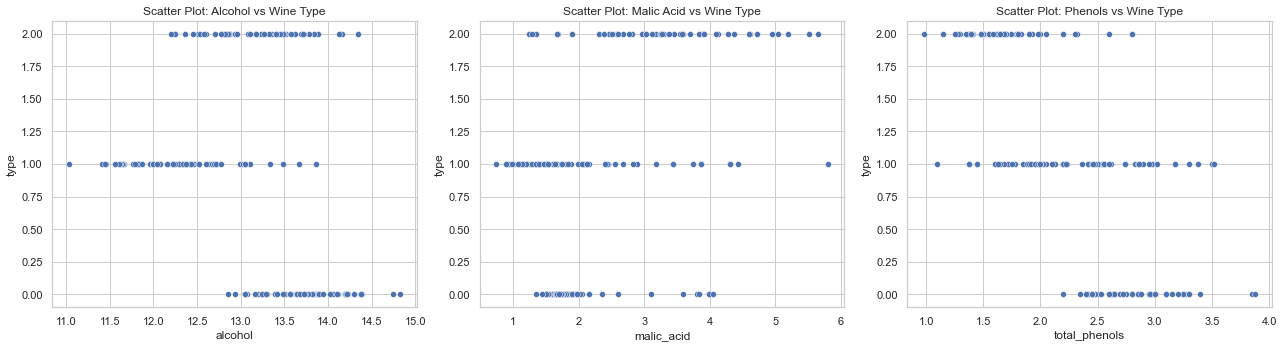

In [28]:
### your code here
# Add the target variable (wine type) to the DataFrame for easy plotting
X=X_full.copy()
X['type'] = y

# Create subplots to compare alcohol, malic acid, and phenols with wine type
fig, axs = plt.subplots(1, 3, figsize=(18,5))

### Scatter Plot
# Scatter plot of alcohol vs wine type with color encoding for wine type
sns.scatterplot(x='alcohol', y='type', data=X,ax=axs[0], palette='Set2')
axs[0].set_title('Scatter Plot: Alcohol vs Wine Type')

# Scatter plot of malic acid vs wine type with color encoding for wine type
sns.scatterplot(x='malic_acid', y='type', data=X,ax=axs[1], palette='Set2')
axs[1].set_title('Scatter Plot: Malic Acid vs Wine Type')

# Scatter plot of phenols vs wine type with color encoding for wine type
sns.scatterplot(x='total_phenols', y='type', data=X,ax=axs[2], palette='Set2')
axs[2].set_title('Scatter Plot: Phenols vs Wine Type')
plt.tight_layout()
plt.show()


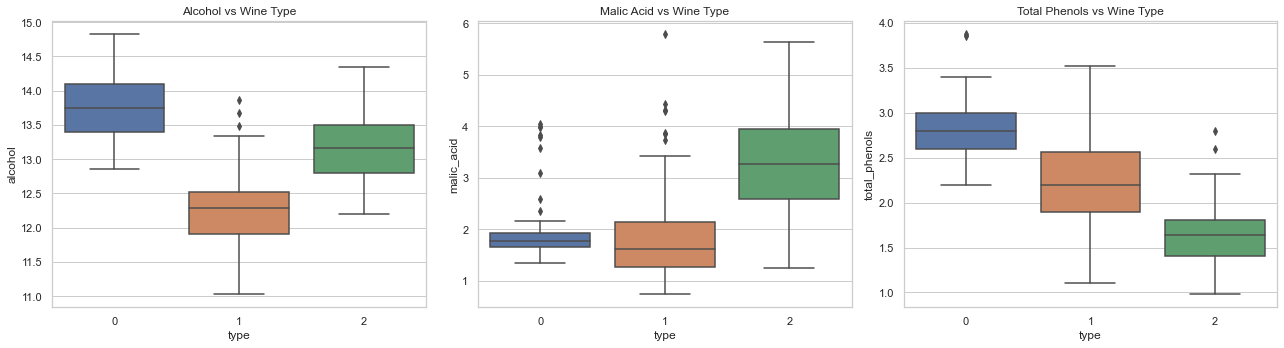

In [27]:
### Box Plot
# Set up the plotting style
sns.set(style="whitegrid")

# Create subplots to compare alcohol, malic acid, and phenols with wine type
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Plot for Alcohol
sns.boxplot(x='type', y='alcohol', data=X, ax=axs[0])
axs[0].set_title('Alcohol vs Wine Type')

# Plot for Malic Acid
sns.boxplot(x='type', y='malic_acid', data=X, ax=axs[1])
axs[1].set_title('Malic Acid vs Wine Type')

# Plot for Phenols
sns.boxplot(x='type', y='total_phenols', data=X, ax=axs[2])
axs[2].set_title('Total Phenols vs Wine Type')

plt.tight_layout()
plt.show()


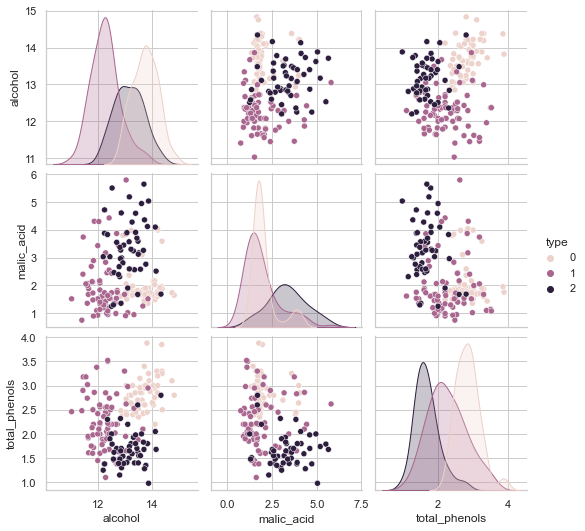

In [26]:
sns.pairplot(X[['alcohol', 'malic_acid', 'total_phenols', 'type']], hue='type')
plt.show()

I suppose alcohol seems to have the strongest association with the response.

**Q3**: Fit 3 different models with ['alcohol','malic_acid'] as the predictors: (1) a standard logistic regression to predict a binary indicator for class 0 (you'll have to crete it yourself), (2) a multinomial logistic regression to predict all 3 classes and (3) a OvR logistic reression to predict all 3 classes.  Compare the results

In [33]:
from sklearn.metrics import accuracy_score

In [29]:
X = X_full[['alcohol', 'malic_acid']]

# Create a binary target variable for class 0
y_binary = (y == 0).astype(int)  # 1 if class is 0, else 0

# Split data into train and test sets (70-30 split)
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=109, shuffle=True)

# Split the data for multinomial and OvR models (no change to y)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.3, random_state=109, shuffle=True)

In [34]:
###your code here
# Model 1: Standard Logistic Regression for binary classification
logit_binary=LogisticRegression(solver='lbfgs',max_iter=1000)
logit_binary.fit(X_train,y_train_binary)

# Predict and calclulate accuracy
y_pred_binary=logit_binary.predict(X_test)
binary_accuracy=accuracy_score(y_test_binary,y_pred_binary)
print(f'Binary Logistic Regresion Accuracy: {binary_accuracy:.4f}')

Binary Logistic Regresion Accuracy: 0.8333


In [39]:
# Model 2: Multinomial Logistic Regression
logit_multi=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
logit_multi.fit(X_train_multi,y_train_multi)

# Predict and calclulate accuracy
y_pred_multi=logit_multi.predict(X_test_multi)
multi_accuracy=accuracy_score(y_test_multi,y_pred_multi)
print(f'Multinomial Logistic Regression Accuracy: {multi_accuracy:.4f}')

Multinomial Logistic Regression Accuracy: 0.7037


In [40]:
# Model 3: One-vs-Rest (OvR) Logistic Regression
logit_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
logit_ovr.fit(X_train_multi, y_train_multi)

# Predict and calculate accuracy
y_pred_ovr = logit_ovr.predict(X_test_multi)
ovr_accuracy = accuracy_score(y_test_multi, y_pred_ovr)
print(f'One-vs-Rest Logistic Regression Accuracy: {ovr_accuracy:.4f}')

One-vs-Rest Logistic Regression Accuracy: 0.7222


In [41]:
# Print accuracy results for all models
print(f'Binary Logistic Regression Accuracy: {binary_accuracy:.4f}')
print(f'Multinomial Logistic Regression Accuracy: {multi_accuracy:.4f}')
print(f'One-vs-Rest Logistic Regression Accuracy: {ovr_accuracy:.4f}')

Binary Logistic Regression Accuracy: 0.8333
Multinomial Logistic Regression Accuracy: 0.7037
One-vs-Rest Logistic Regression Accuracy: 0.7222


*your answer here*

**Q4**: For the Multinomial model, use the estimated coefficients to calculate the predicted probabilties by hand.  Feel free to confirm with the `predict_proba` command.

In [42]:
### your code here
# Get coefficients and intercepts from the multinomial model
print("Intercepts for Multinomial Model:")
print(logit_multi.intercept_)

print("Coefficients for Multinomial Model:")
print(logit_multi.coef_)

Intercepts for Multinomial Model:
[-22.95332395  27.02673117  -4.07340722]
Coefficients for Multinomial Model:
[[ 1.82854582 -0.49908481]
 [-2.00088341 -0.33002544]
 [ 0.17233759  0.82911026]]


In [43]:
X_test_point = X_test_multi.iloc[0]
print(X_test_point)

alcohol       13.30
malic_acid     1.72
Name: 27, dtype: float64


In [46]:
# Use the model to predict probabilities for the same test point
y_prob = logit_multi.predict_proba([X_test_point])
print(f"Predicted probabilities: {y_prob}")

Predicted probabilities: [[0.51589361 0.26648794 0.21761845]]


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0.392, 0.341, 0.266

**Q5**: For the OvR model, use the `predict_proba()` to estimate the predicted probabilities in the test set, and manually use this to calculate the predicted classes.  Feel free to confirm with the `predict` command.

In [47]:
# Using the OvR Logistic Regression model to predict probabilities on the test set
y_prob_ovr = logit_ovr.predict_proba(X_test)
print(y_prob_ovr[:5])  # Show the first 5 predicted probabilities

# Manually calculate the predicted classes by choosing the class with the highest probability
y_pred_ovr_manual = np.argmax(y_prob_ovr, axis=1)
print(y_pred_ovr_manual[:5])  # Show the first 5 predicted classes

# Use the OvR model to predict the class labels directly
y_pred_ovr = logit_ovr.predict(X_test)
print(y_pred_ovr[:5])  # Show the first 5 predicted classes

# Check if both methods give the same result
assert np.array_equal(y_pred_ovr_manual, y_pred_ovr), "The manual predictions and the predict() predictions don't match!"

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the OvR model
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Accuracy of OvR model: {accuracy_ovr:.4f}")


[[0.52650048 0.32254006 0.15095946]
 [0.05314637 0.205188   0.74166563]
 [0.07316788 0.88171123 0.04512089]
 [0.00326905 0.13393477 0.86279618]
 [0.38662665 0.00435001 0.60902334]]
[0 2 1 2 2]
[0 2 1 2 2]
Accuracy of OvR model: 0.7222


**Q6**: How could you use the `predict_proba()` command and 'change the threshold' in the multiclass setting to affect predictive accuracies within each class?  Note: it is not as simple as changing a threshold because there is not threshold

In [48]:
y_prob = logit_ovr.predict_proba(X_test)
print(y_prob[:5])

threshold = 0.6
y_prob = logit_ovr.predict_proba(X_test)

# Apply the threshold
y_pred_threshold = np.argmax(y_prob >= threshold, axis=1)

thresholds = [0.5, 0.6, 0.7]  # Custom thresholds for class 0, class 1, and class 2
y_pred_custom_threshold = np.zeros_like(np.argmax(y_prob, axis=1))

# Apply custom thresholds
for i in range(len(y_prob)):
    for j in range(len(y_prob[i])):
        if y_prob[i, j] >= thresholds[j]:
            y_pred_custom_threshold[i] = j

from sklearn.metrics import classification_report

# Evaluate the model with custom thresholds
print("Classification Report with custom thresholds:")
print(classification_report(y_test, y_pred_custom_threshold))        

[[0.52650048 0.32254006 0.15095946]
 [0.05314637 0.205188   0.74166563]
 [0.07316788 0.88171123 0.04512089]
 [0.00326905 0.13393477 0.86279618]
 [0.38662665 0.00435001 0.60902334]]
Classification Report with custom thresholds:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        21
           1       0.78      0.74      0.76        19
           2       0.78      0.50      0.61        14

    accuracy                           0.72        54
   macro avg       0.74      0.70      0.71        54
weighted avg       0.73      0.72      0.72        54



**Q7**: Compare the accuracies in both train and test for both the multinomial and OvR logistic regressions.  Which seems to be performing better?  Is there any evidence of overfitting?  How could this be corrected?

In [50]:
### your code here
train_acc_multi=logit_multi.score(X_train,y_train)
test_acc_multi=logit_multi.score(X_test,y_test)

train_acc_ovr=logit_ovr.score(X_train,y_train)
test_acc_ovr=logit_ovr.score(X_test,y_test)

# Print the accuracies
print("Multinomial Logistic Regression - Train Accuracy:", train_acc_multi)
print("Multinomial Logistic Regression - Test Accuracy:", test_acc_multi)

print("OvR Logistic Regression - Train Accuracy:", train_acc_ovr)
print("OvR Logistic Regression - Test Accuracy:", test_acc_ovr)

Multinomial Logistic Regression - Train Accuracy: 0.8064516129032258
Multinomial Logistic Regression - Test Accuracy: 0.7037037037037037
OvR Logistic Regression - Train Accuracy: 0.7903225806451613
OvR Logistic Regression - Test Accuracy: 0.7222222222222222


In [51]:
logit_multi_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.1, max_iter=1000).fit(X_train, y_train)
logit_ovr_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', C=0.1, max_iter=1000).fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

# Cross-validation scores
scores_multi = cross_val_score(logit_multi, X_full, y, cv=5)
scores_ovr = cross_val_score(logit_ovr, X_full, y, cv=5)

print("Multinomial Cross-validation scores:", scores_multi)
print("OvR Cross-validation scores:", scores_ovr)


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

Multinomial Cross-validation scores: [0.88888889 0.94444444 0.94444444 1.         1.        ]
OvR Cross-validation scores: [0.97222222 0.94444444 0.94444444 1.         1.        ]


Based on the training and test accuracies, the OvR logistic regression model seems to perform better than the multinomial logistic regression model in this case, with less evidence of overfitting. However, the multinomial model shows a larger drop in test accuracy, indicating overfitting. To reduce this, applying regularization (e.g., L2) and performing cross-validation would help to improve generalization and reduce overfitting.

**Q8**: Create the classification boundaries for the two multiclass logistic regression models above.  How do they compare?

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


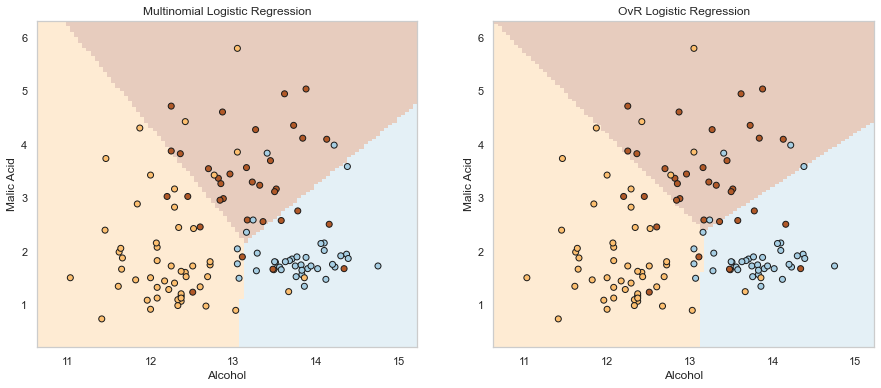

In [53]:
###your code here
# Define feature ranges
x1_range = X_full['alcohol'].max() - X_full['alcohol'].min()
x2_range = X_full['malic_acid'].max() - X_full['malic_acid'].min()
x1_min, x1_max = X_full['alcohol'].min() - 0.1 * x1_range, X_full['alcohol'].max() + 0.1 * x1_range
x2_min, x2_max = X_full['malic_acid'].min() - 0.1 * x2_range, X_full['malic_acid'].max() + 0.1 * x2_range

# Create a grid of points
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05), np.arange(x2_min, x2_max, 0.05))
grid_points = np.c_[xx1.ravel(), xx2.ravel()]  # Flatten into a 2D array of points

# Predict using the multinomial logistic regression model
y_hat_multi = logit_multi.predict(grid_points)

# Predict using the OvR logistic regression model
y_hat_ovr = logit_ovr.predict(grid_points)

# Reshape predictions to match the grid shape
y_hat_multi = y_hat_multi.reshape(xx1.shape)
y_hat_ovr = y_hat_ovr.reshape(xx1.shape)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for multinomial logistic regression
ax1.pcolormesh(xx1, xx2, y_hat_multi, cmap=plt.cm.Paired, alpha=0.3)
ax1.scatter(X_train['alcohol'], X_train['malic_acid'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax1.set_title('Multinomial Logistic Regression')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')

# Plot for OvR logistic regression
ax2.pcolormesh(xx1, xx2, y_hat_ovr, cmap=plt.cm.Paired, alpha=0.3)
ax2.scatter(X_train['alcohol'], X_train['malic_acid'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax2.set_title('OvR Logistic Regression')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic Acid')

plt.show()


*your answer here*

**Q9**: Fit 3 different knn regression models: for $k = 3, 10, 30$. Visualize the classification boundaries for these 3 models and compare the results.  Which seem to be overfit?

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_la

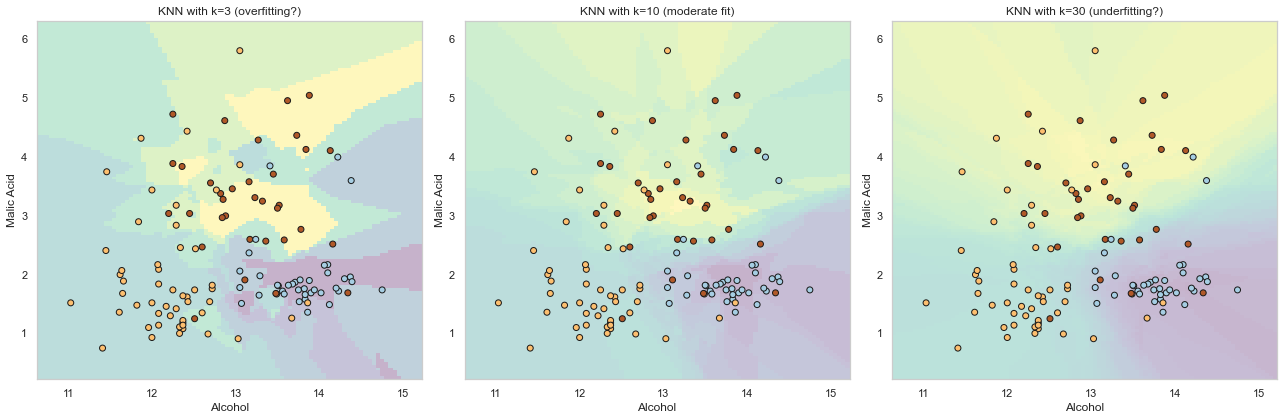

In [55]:
from sklearn.neighbors import KNeighborsRegressor
# Train KNN models for k=3, k=10, k=30
knn3 = KNeighborsRegressor(n_neighbors=3).fit(X_train[['alcohol', 'malic_acid']], y_train)
knn10 = KNeighborsRegressor(n_neighbors=10).fit(X_train[['alcohol', 'malic_acid']], y_train)
knn30 = KNeighborsRegressor(n_neighbors=30).fit(X_train[['alcohol', 'malic_acid']], y_train)

# Predict over the grid for each model
y_hat_knn3 = knn3.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat_knn10 = knn10.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat_knn30 = knn30.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Reshape predictions to match grid
y_hat_knn3 = y_hat_knn3.reshape(xx1.shape)
y_hat_knn10 = y_hat_knn10.reshape(xx1.shape)
y_hat_knn30 = y_hat_knn30.reshape(xx1.shape)

# Create the plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot for k=3 (small k, high variance, overfitting likely)
ax1.pcolormesh(xx1, xx2, y_hat_knn3, cmap=plt.cm.viridis, alpha=0.3)
ax1.scatter(X_train['alcohol'], X_train['malic_acid'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax1.set_title('KNN with k=3 (overfitting?)')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')

# Plot for k=10 (moderate k, more general)
ax2.pcolormesh(xx1, xx2, y_hat_knn10, cmap=plt.cm.viridis, alpha=0.3)
ax2.scatter(X_train['alcohol'], X_train['malic_acid'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax2.set_title('KNN with k=10 (moderate fit)')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic Acid')

# Plot for k=30 (large k, high bias, underfitting likely)
ax3.pcolormesh(xx1, xx2, y_hat_knn30, cmap=plt.cm.viridis, alpha=0.3)
ax3.scatter(X_train['alcohol'], X_train['malic_acid'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
ax3.set_title('KNN with k=30 (underfitting?)')
ax3.set_xlabel('Alcohol')
ax3.set_ylabel('Malic Acid')

plt.tight_layout()
plt.show()

**Q10** How could you visualize the classification boundary for any of these models if there was a single predictor?  What if there were more than 2 predictors?

If we have only one predictor (a single feature), visualizing the classification boundary is relatively straightforward. Since we are predicting a class based on just one feature, the boundary can be visualized as a vertical line on a 2D plot.

When we have more than two predictors (e.g., 3 or more features), visualizing the decision boundary directly in 3D or higher dimensions becomes challenging. However, we can reduce dimensions using techniques like Principal Component Analysis (PCA).